In [1]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../experiments")


from experiment_information import *
from experiment_setup import *
from data import *
from helpers import *
from data_loading import *
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)


import numpy as np
import re
%load_ext autoreload
%autoreload 2

This code assumes that you have defined and run an experiment before using `define_experiment.ipynb` in the `experiments` folder.

In [2]:
df_experiments, df_state_evolution, df_erm = obtain_dataframes(logger)

Current code version, 112


In [3]:
df_experiments.head(5)

,experiment_id,experiment_name,duration,problem_types,code_version,date,state_evolution_repetitions,erm_repetitions,alphas,epsilons,...,taus,ps,dp,d,experiment_type,completed,data_model_types,data_model_names,data_model_descriptions,gamma_fair_error
28,15942d4f-b5ac-4ff5-8cc8-9bfd64251097,SweepRobustnessUsefulFeatures,1151.845540,"[""Logistic""]",112,2024-05-11 20:12:34,1,0,[1000.0],"[0.0, 0.001, 0.2]",...,[0.1],null,0.01,2000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""AA_KFeaturesModel_TwoFeatures_ProtectingSeco...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
26,3d380366-1cd0-4a95-aa32-d76ebf74906b,SweepRobustnessUsefulFeatures,671.076893,"[""Logistic""]",112,2024-05-11 19:27:21,1,0,[5000.0],"[0.0, 0.1]",...,[0.05],null,0.01,2000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""AA_KFeaturesModel_TwoFeatures_ProtectingSeco...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
25,bc4915ca-9b16-4ce4-ab03-0f3c53674fa8,SweepRobustnessUsefulFeatures,637.469754,"[""Logistic""]",112,2024-05-11 18:38:05,1,0,[10000.0],"[0.0, 0.1]",...,[0.05],null,0.01,2000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""AA_KFeaturesModel_TwoFeatures_ProtectingSeco...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
24,cc190b09-2a3a-44ad-ad75-6980e340f274,FeatureComparisonsTest,653.408825,"[""Logistic""]",112,2024-05-11 18:02:28,1,0,[10000.0],"[0.0, 0.1]",...,[0.05],null,0.01,2000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001
22,aff57b8f-f959-4311-8926-6f7840fe2ae3,FeatureComparisonsTest,1143.988386,"[""Logistic""]",112,2024-05-11 15:33:14,1,0,"[10.0, 16.2378, 26.3665, 42.8133, 69.5193, 112...","[0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",...,[0.05],null,0.01,2000,Sweep,1,"[""KFeaturesModel"", ""KFeaturesModel"", ""KFeature...","[""KFeaturesModel_TwoFeatures_ProtectingSecondS...","[""2 Features, Theta Identity, Sigma_upsilon Id...",0.0001


In [4]:
experiment_loc = 0

# extract and print the top experiment_id
experiment_id = df_experiments.iloc[experiment_loc]["experiment_id"]
print(experiment_id)

# extract and print the experiment type
experiment_type = df_experiments.iloc[experiment_loc]["experiment_type"]
print(experiment_type)

# extract and print the data model type and data_model name used
data_model_types = df_experiments.iloc[experiment_loc]["data_model_types"]
# convert it to the enum
data_model_types = [DataModelType[data_model_type] for data_model_type in json.loads(data_model_types)]
data_model_names = [name for name in json.loads(df_experiments.iloc[experiment_loc]["data_model_names"])]
data_model_descriptions = df_experiments.iloc[experiment_loc]["data_model_descriptions"]
# for data_model_type in data_model_types:
#     print(data_model_type.name)
print(len(data_model_types))

print(data_model_names)
print(data_model_descriptions)

# print the experiment name
experiment_name = df_experiments.iloc[experiment_loc]["experiment_name"]
print(experiment_name)

# print the experiment problem types
experiment_problem_types = df_experiments.iloc[experiment_loc]["problem_types"]
experiment_problem_types = json.loads(experiment_problem_types)
print(experiment_problem_types)

15942d4f-b5ac-4ff5-8cc8-9bfd64251097
Sweep
100
['AA_KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.25 0.25]_[0.5 0.5]_SD_1_1_SU_1_1___SweepRobustnessUsefulFeatures', 'AA_KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.25 0.25]_[1.33333333 1.33333333]_SD_1_1_SU_1_1___SweepRobustnessUsefulFeatures', 'AA_KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.25 0.25]_[2.16666667 2.16666667]_SD_1_1_SU_1_1___SweepRobustnessUsefulFeatures', 'AA_KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.25 0.25]_[3. 3.]_SD_1_1_SU_1_1___SweepRobustnessUsefulFeatures', 'AA_KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.25 0.25]_[3.83333333 3.83333333]_SD_1_1_SU_1_1___SweepRobustnessUsefulFeatures', 'AA_KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.25 0.25]_[4.66666667 4.66666667]_SD_1_1_SU_1_1___SweepR

In [5]:
data_model_name_dict = {}
data_model_name_dict["VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["2_VanillaGaussian"] = "Vanilla Gaussian"
data_model_name_dict["VanillaGaussianThetaFirst"] = "Vanilla Gaussian - Teacher 10:1"
data_model_name_dict["VanillaGaussianTimes10"] = "Vanilla Gaussian x10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1 1]"] = "Strong Weak 5:1"
data_model_name_dict["2_KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[1 1]"] = "Strong Weak 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[10  1]"] = "Strong Weak 5:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[10  1]"] = "Strong Weak 10:1 - Teacher 10:1"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[ 1 10]"] = "Strong Weak 5:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[10  1]_[ 1 10]"] = "Strong Weak 10:1 - Teacher 1:10"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[1 1]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[5 5]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[5 5]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[1 1]_SD_1_1_SU_1_1___RhoNormalisationSweepAllFeatureCombinations"] = "Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[1 1]_SD_1_1_SU_1_1"] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[5 5]_SD_1_1_SU_1_1"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[5 5]_SD_1_1_SU_1_1"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[5 5]_[1 1]_SD_1_1_SU_1_1"] = "Robust Non-Useful"

data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2 2]_[2 2]_SD_1_1_SU_1_1"] = "Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[1 1]_[4 4]_SD_1_1_SU_1_1"] = "Non-Robust Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[2 2]_[0.5 0.5]_SD_1_1_SU_1_1"] = "Robust Non-Useful"


data_model_name_dict['KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.5 0.5]_[2 2]_SD_1_1_SU_1_1'] = "Non-Robust Non-Useful"
data_model_name_dict["KFeaturesModel_TwoFeatures_ProtectingSecondStronger_AttackingIdentity_[0.5 0.5]_[0.5 0.5]_[8 8]_SD_1_1_SU_1_1"] = "Non-Robust Useful"


In [6]:
state_evolution = df_state_evolution[df_state_evolution["experiment_id"] == experiment_id]
gd = df_erm[df_erm["experiment_id" ] == experiment_id]
# make the column subspace_overlaps to string
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: str(x))

# create a json colum
state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))
gd["subspace_overlaps"] = gd["subspace_overlaps"].apply(lambda x: json.loads(x))
from pandas import json_normalize
# normalize the json column
normalized = json_normalize(state_evolution["subspace_overlaps"])
normalized_gd = json_normalize(gd["subspace_overlaps"])



def explode_array_column(row, col):
    return pd.Series(row[col])

# reset the index of the original dataframe
state_evolution = state_evolution.reset_index(drop=True)
gd = gd.reset_index(drop=True)

for col in normalized.columns:
    expanded_cols = normalized.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)
    state_evolution = pd.concat([state_evolution, expanded_cols], axis=1)

for col in normalized_gd.columns:
    expanded_cols = normalized_gd.apply(lambda x: explode_array_column(x,col), axis=1)
    col = col[:-1]
    expanded_cols.columns = [col+'_{}'.format(i) for i in range(expanded_cols.shape[1])]
    # reset the index of the expanded columns
    expanded_cols = expanded_cols.reset_index(drop=True)

    gd = pd.concat([gd, expanded_cols], axis=1)



/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_46197/3607721679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: str(x))
/var/folders/vl/6t_sjl4j16nd3xx4b0t7wd280000gn/T/ipykernel_46197/3607721679.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_evolution["subspace_overlaps"] = state_evolution["subspace_overlaps"].apply(lambda x: json.loads(x))


In [7]:
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: str(x))
state_evolution["subspace_overlaps_ratio"] = state_evolution["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(state_evolution["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
state_evolution = pd.concat([state_evolution, normalized], axis=1)
# drop the original subspace_overlaps column
state_evolution = state_evolution.drop(columns=["subspace_overlaps_ratio"])

gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: str(x))
gd["subspace_overlaps_ratio"] = gd["subspace_overlaps_ratio"].apply(lambda x: json.loads(x))
normalized = json_normalize(gd["subspace_overlaps_ratio"])
# rename the columns of the normalized dataframe
for column in normalized.columns:
    normalized = normalized.rename(columns={column:column+"_ratio"})
# merge the normalized dataframe with the original dataframe
gd = pd.concat([gd, normalized], axis=1)
# drop the original subspace_overlaps column
gd = gd.drop(columns=["subspace_overlaps_ratio"])


In [8]:
# create a column for the difference between the adversarial_generalization_error and the generalization_error for both the state evolution and the erm
state_evolution["difference_adv_gen"] = state_evolution["adversarial_generalization_error"] - state_evolution["generalization_error"]
gd["difference_adv_gen"] = gd["adversarial_generalization_error"] - gd["generalization_error_erm"]

state_evolution["ratio_adv_gen"] = state_evolution["adversarial_generalization_error"] / state_evolution["generalization_error"]
gd["ratio_adv_gen"] = gd["adversarial_generalization_error"] / gd["generalization_error_erm"]

In [9]:
# create a column for the noise contribution
def noise_contribution(rho: float, tau: float) -> float:
    if tau == 0:
        tau = 1e-10
    return 0.5 - np.arctan( np.sqrt( rho / tau**2 ) ) / np.pi

state_evolution["noise_contribution"] = state_evolution.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)
gd["noise_contribution"] = gd.apply(lambda x: noise_contribution(x["rho"], x["tau"]), axis=1)

In [10]:
# create a column for the noiseless generalization error without the noise contribution
state_evolution["noiseless_generalization_error"] = state_evolution["generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_generalization_error_erm"] = gd["generalization_error_erm"] - gd["noise_contribution"]

# create a column for the adversarial noiseless generalization error without the noise contribution
state_evolution["noiseless_adversarial_generalization_error"] = state_evolution["adversarial_generalization_error"] - state_evolution["noise_contribution"]
gd["noiseless_adversarial_generalization_error"] = gd["adversarial_generalization_error"] - gd["noise_contribution"]

In [11]:
def noiseless_angle_to_generalisation(angle):
    return np.arccos(angle) / np.pi

state_evolution["noiseless_angle_to_generalisation"] = state_evolution.apply(lambda x: noiseless_angle_to_generalisation(x["angle"]), axis=1)
gd["noiseless_angle_to_generalisation"] = gd.apply(lambda x: noiseless_angle_to_generalisation(x["angle"]), axis=1)

In [12]:
# create a column for the A/sqrt(q*N) for both the state evolution and the erm
state_evolution["A_over_sqrt_qN"] = state_evolution["A"] / np.sqrt(state_evolution["q"] * state_evolution["N"])
gd["A_over_sqrt_qN"] = gd["A"] / np.sqrt(gd["q"] * gd["N"])

In [13]:
# create a column for m/sqrt( rho*q - m**2 ) vs A/sqrt(q*N) for both the state evolution and the erm
state_evolution["m_over_sqrt_rhoq_minus_m2"] = state_evolution["m"] / np.sqrt(state_evolution["rho"] * state_evolution["q"] - state_evolution["m"]**2)
gd["m_over_sqrt_rhoq_minus_m2"] = gd["m"] / np.sqrt(gd["rho"] * gd["q"] - gd["m"]**2)

In [14]:
# strip the data_model_name if there is a sequence ___text at the end
def strip_data_model_name(data_model_name):
    return re.sub(r"___.*","",data_model_name)
state_evolution["data_model_name"] = state_evolution["data_model_name"].apply(strip_data_model_name)
gd["data_model_name"] = gd["data_model_name"].apply(strip_data_model_name)

In [15]:
def extract_theta_ratio(data_model_name):
    # a typical data_model_name looks like ""KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1. 1.]_SD_1_1_SU_1_1""
    # we want to extract the digits in within the last square brackets
    theta_part = data_model_name.split("[")[-1].split("]")[0]
    # remove any spaces in the end
    theta_part = theta_part.strip()
    

    # concatenate multiple spaces into one space
    theta_part = re.sub(r"\s+"," ",theta_part)

    # determine whether the two values are split by " " or by "  "
    if "  " in theta_part:
        splitter = "  "
    else:
        splitter = " "

    theta_first = float(theta_part.split(splitter)[0])
    theta_second = float(theta_part.split(splitter)[1])
    return theta_second # / theta_first  


state_evolution["theta_ratio"] = state_evolution["data_model_name"].apply(extract_theta_ratio)
gd["theta_ratio"] = gd["data_model_name"].apply(extract_theta_ratio)

In [16]:
def extract_sigmax_ratio(data_model_name):
    # a typical data_model_name looks like ""KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1. 1.]_SD_1_1_SU_1_1""
    # we want to extract the digits in within the last square brackets
    theta_part = data_model_name.split("[")[-2].split("]")[0]
    # remove any spaces in the end
    theta_part = theta_part.strip()

    # concatenate multiple spaces into one space
    theta_part = re.sub(r"\s+"," ",theta_part)

    # determine whether the two values are split by " " or by "  "
    if "  " in theta_part:
        splitter = "  "
    else:
        splitter = " "

    theta_first = float(theta_part.split(splitter)[0])
    theta_second = float(theta_part.split(splitter)[1])
    return theta_first # / theta_second


state_evolution["sigmax_ratio"] = state_evolution["data_model_name"].apply(extract_sigmax_ratio)
gd["sigmax_ratio"] = gd["data_model_name"].apply(extract_sigmax_ratio)

In [17]:
def extract_sigmadelta_ratio(data_model_name):
    # a typical data_model_name looks like ""KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1. 1.]_SD_1_1_SU_1_1""
    # we want to extract the digits after the SD_ only
    theta_part = data_model_name.split("SD")[-1].split("SU")[0]
    # print("Post SD: ", theta_part)


    # remove leading _ and ending _
    theta_part = theta_part.strip("_")
    # print("Post strip: ", theta_part)

    # concatenate multiple spaces into one space
    theta_part = re.sub(r"\s+"," ",theta_part)

    # define the spliter to be "_"
    splitter = "_"

    theta_first = float(theta_part.split(splitter)[0])
    theta_second = float(theta_part.split(splitter)[1])
    # print("Theta first: ", theta_first)
    # print("Theta second: ", theta_second)
    return theta_second  #/ theta_first

def extract_sigmadelta_scale(data_model_name):
    # a typical data_model_name looks like ""KFeaturesModel_TwoFeatures_ProtectingIdentity_AttackingIdentity_[0.5 0.5]_[5 1]_[1. 1.]_SD_1_1_SU_1_1""
    # we want to extract the digits after the SD_ only
    theta_part = data_model_name.split("SD")[-1].split("SU")[0]
    # print("Post SD: ", theta_part)


    # remove leading _ and ending _
    theta_part = theta_part.strip("_")
    # print("Post strip: ", theta_part)

    # concatenate multiple spaces into one space
    theta_part = re.sub(r"\s+"," ",theta_part)

    # define the spliter to be "_"
    splitter = "_"

    theta_first = float(theta_part.split(splitter)[0])
    theta_second = float(theta_part.split(splitter)[1])
    # print("Theta first: ", theta_first)
    # print("Theta second: ", theta_second)
    return theta_first


state_evolution["sigmadelta_ratio"] = state_evolution["data_model_name"].apply(extract_sigmadelta_ratio)
gd["sigmadelta_ratio"] = gd["data_model_name"].apply(extract_sigmadelta_ratio)

state_evolution["sigmadelta_scale"] = state_evolution["data_model_name"].apply(extract_sigmadelta_scale)
gd["sigmadelta_scale"] = gd["data_model_name"].apply(extract_sigmadelta_scale)

In [18]:
gd = gd.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","sigmax_ratio","sigmadelta_ratio","theta_ratio","data_model_name"]) #,"p_calibration"
state_evolution = state_evolution.set_index(["alpha","epsilon","tau","lam","problem_type","attack_epsilon","sigmax_ratio","sigmadelta_ratio","theta_ratio","data_model_name"]) #,"p_calibration"

# drop id, code_version, experiment_id, date, initial_condition, test_against_epsilons, calibrations, abs_tol, min_iter,max_iter,blend_fpe,int_lims,subspace_overlaps
state_evolution = state_evolution.drop(columns=["id","code_version","experiment_id","date","initial_condition","test_against_epsilons","calibrations","abs_tol","min_iter","max_iter","blend_fpe","int_lims","subspace_overlaps","data_model_type","data_model_description"])
# drop id, code_version, experiment_id, test_against_epsilons, date, subspace_overlaps, analytical_calibrations, erm_calibrations, 
gd = gd.drop(columns=["id","code_version","experiment_id","test_against_epsilons","date","subspace_overlaps","analytical_calibrations","erm_calibrations","data_model_type","data_model_description"])

state_evolution.columns = [col+"_state_evolution" for col in state_evolution.columns]
gd.columns = [col+"_erm" for col in gd.columns]

state_evolution = state_evolution.groupby(level=[0,1,2,3,4,5,6,7,8,9]).agg(["mean","std"]) #,4
gd = gd.groupby(level=[0,1,2,3,4,5,6,7,8,9]).agg(["mean","std"]) #,4
df = state_evolution.join(gd, how="outer")
df.sort_index()
df

index_state_evolution  \
                                                                                                                                                                  mean   
alpha  epsilon tau lam  problem_type attack_epsilon sigmax_ratio sigmadelta_ratio theta_ratio data_model_name                                                            
1000.0 0.0     0.1 0.01 Logistic     0.2            0.25         1.0              0.500000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2279.0   
                                                                                  1.333333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2280.0   
                                                                                  2.166667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2284.0   
                                                                                  3.000000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2287.0   
                                                                                  3.833333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2290.0   
...                                                                                                                                                                ...   
       0.2     0.1 0.01 Logistic     0.2            2.50         1.0              4.666667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2560.0   
                                                                                  5.500000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2562.0   
                                                                                  6.333333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2565.0   
                                                                                  7.166667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2568.0   
                                                                                  8.000000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2571.0   

                                                                                                                                                      \
                                                                                                                                                 std   
alpha  epsilon tau lam  problem_type attack_epsilon sigmax_ratio sigmadelta_ratio theta_ratio data_model_name                                          
1000.0 0.0     0.1 0.01 Logistic     0.2            0.25         1.0              0.500000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  1.333333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  2.166667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  3.000000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  3.833333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
...                                                                                                                                               ..   
       0.2     0.1 0.01 Logistic     0.2            2.50         1.0              4.666667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  5.500000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  6.333333  

In [19]:
print(df.index.get_level_values('alpha').unique())
print(df.index.get_level_values('epsilon'))
print(df.index.get_level_values('sigmax_ratio'))
print(df.index.get_level_values('theta_ratio'))

Index([1000.0], dtype='float64', name='alpha')
Index([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       ...
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
      dtype='float64', name='epsilon', length=296)
Index([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       ...
       2.25,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5],
      dtype='float64', name='sigmax_ratio', length=296)
Index([       0.5, 1.33333333, 2.16666667,        3.0, 3.83333333, 4.66666667,
              5.5, 6.33333333, 7.16666667,        8.0,
       ...
              8.0,        0.5, 1.33333333, 2.16666667, 3.83333333, 4.66666667,
              5.5, 6.33333333, 7.16666667,        8.0],
      dtype='float64', name='theta_ratio', length=296)


In [20]:
df

index_state_evolution  \
                                                                                                                                                                  mean   
alpha  epsilon tau lam  problem_type attack_epsilon sigmax_ratio sigmadelta_ratio theta_ratio data_model_name                                                            
1000.0 0.0     0.1 0.01 Logistic     0.2            0.25         1.0              0.500000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2279.0   
                                                                                  1.333333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2280.0   
                                                                                  2.166667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2284.0   
                                                                                  3.000000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2287.0   
                                                                                  3.833333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2290.0   
...                                                                                                                                                                ...   
       0.2     0.1 0.01 Logistic     0.2            2.50         1.0              4.666667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2560.0   
                                                                                  5.500000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2562.0   
                                                                                  6.333333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2565.0   
                                                                                  7.166667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2568.0   
                                                                                  8.000000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS...                2571.0   

                                                                                                                                                      \
                                                                                                                                                 std   
alpha  epsilon tau lam  problem_type attack_epsilon sigmax_ratio sigmadelta_ratio theta_ratio data_model_name                                          
1000.0 0.0     0.1 0.01 Logistic     0.2            0.25         1.0              0.500000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  1.333333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  2.166667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  3.000000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  3.833333    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
...                                                                                                                                               ..   
       0.2     0.1 0.01 Logistic     0.2            2.50         1.0              4.666667    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  5.500000    AA_KFeaturesModel_TwoFeatures_ProtectingSecondS... NaN   
                                                                                  6.333333  

# Extracting Data

In [21]:
# extract unique epsilons
epsilons = df.index.get_level_values("epsilon").unique()
epsilons

Index([0.0, 0.001, 0.2], dtype='float64', name='epsilon')

In [22]:
# extract unique attack epsilons
attack_epsilons = df.index.get_level_values("attack_epsilon").unique()
attack_epsilons

Index([0.2], dtype='float64', name='attack_epsilon')

In [23]:
data_model_names = df.index.get_level_values("data_model_name").unique()

In [24]:
# df_dict['Non-Robust Non-Useful'][0.2]["generalization_error"]

# Plotting

In [25]:
IMG_DIRECTORY = "./Assets/feature_combination_sweeps"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [26]:
data_extracted = df.xs(0.2, level="epsilon").reset_index(["data_model_name", "alpha", "tau", "lam", "problem_type",
                                                          "attack_epsilon", "sigmadelta_ratio"], drop=True)['generalization_error_state_evolution']['mean'].unstack()
data_extracted

theta_ratio,0.500000,1.333333,2.166667,3.000000,3.833333,4.666667,5.500000,6.333333,7.166667,8.000000
sigmax_ratio,,,,,,,,,,
0.25,0.088124,0.055099,0.043595,0.037288,0.033174,0.030225,0.027981,0.026203,0.024750,0.023535
0.50,0.063191,0.039274,0.031070,0.026596,0.023689,0.021611,0.020034,0.018786,0.017769,0.016920
0.75,0.051876,0.032201,0.025492,0.021844,0.019478,0.017789,0.016509,0.015498,0.014675,0.013989
1.00,0.045067,0.027969,0.022160,0.019007,0.016964,0.015509,0.014407,0.013537,0.012830,0.012240
1.25,0.040396,0.025076,0.019884,0.017069,0.015248,0.013952,0.012971,0.012198,0.011570,0.011047
1.50,0.036937,0.022938,0.018202,0.015638,0.013981,0.012802,0.011911,0.011209,0.010639,0.010165
1.75,0.034243,0.021275,0.016895,0.014526,0.012995,0.011908,0.011086,0.010440,0.009915,0.009479
2.00,0.032067,0.019934,0.015840,0.013628,0.012201,0.011187,0.010422,0.009820,0.009331,0.008926
2.25,0.030263,0.018822,0.014967,0.012885,0.011542,0.010589,0.009871,0.009306,0.008847,0.008467


In [27]:
sigmax_rat_vals_01 = data_extracted.index.values
theta_rat_vals_01 = data_extracted.columns.values
gen_err_eps_01 = data_extracted.values

In [28]:
data_extracted = df.xs(0.0, level="epsilon").reset_index(["data_model_name", "alpha", "tau", "lam", "problem_type",
                                                          "attack_epsilon", "sigmadelta_ratio"], drop=True)['generalization_error_state_evolution']['mean'].unstack()
data_extracted

theta_ratio,0.500000,1.333333,2.166667,3.000000,3.833333,4.666667,5.500000,6.333333,7.166667,8.000000
sigmax_ratio,,,,,,,,,,
0.25,0.087976,0.054821,0.043215,0.036821,0.032631,0.029613,0.027308,0.025472,0.023965,0.022700
0.50,0.063064,0.039019,0.030716,0.026159,0.023179,0.021036,0.019400,0.018098,0.017030,0.016134
0.75,0.051754,0.031953,0.025146,0.021416,0.018979,0.017227,0.015889,0.014825,0.013953,0.013221
1.00,0.044948,0.027725,0.021819,0.018584,0.016472,0.014953,0.013795,0.012873,0.012118,0.011484
1.25,0.040279,0.024834,0.019545,0.016650,0.014760,0.013401,0.012365,0.011541,0.010865,0.010298
1.50,0.036821,0.022697,0.017865,0.015222,0.013495,0.012255,0.011309,0.010557,0.009940,0.009423
1.75,0.034127,0.021035,0.016560,0.014111,0.012513,0.011364,0.010489,0.009792,0.009222,0.008743
2.00,0.031953,0.019695,0.015506,0.013216,0.011720,0.010646,0.009827,0.009176,0.008643,0.008195
2.25,0.030149,0.018584,0.014634,0.012474,0.011064,0.010051,NaN,0.008666,0.008163,0.007741


In [29]:
sigmax_rat_vals_00 = data_extracted.index.values
theta_rat_vals_00 = data_extracted.columns.values
gen_err_eps_00 = data_extracted.values

Text(0.5, 0.92, '3D plot of Generalization Error for epsilon = ')

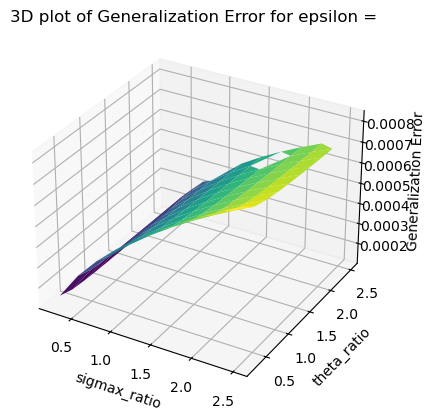

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = sigmax_rat_vals_01
y = sigmax_rat_vals_01
X, Y = np.meshgrid(x, y)
Z = gen_err_eps_01 - gen_err_eps_00

# Plotting the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('sigmax_ratio')
ax.set_ylabel('theta_ratio')
ax.set_zlabel('Generalization Error')
ax.set_title(f'3D plot of Generalization Error for epsilon = ')

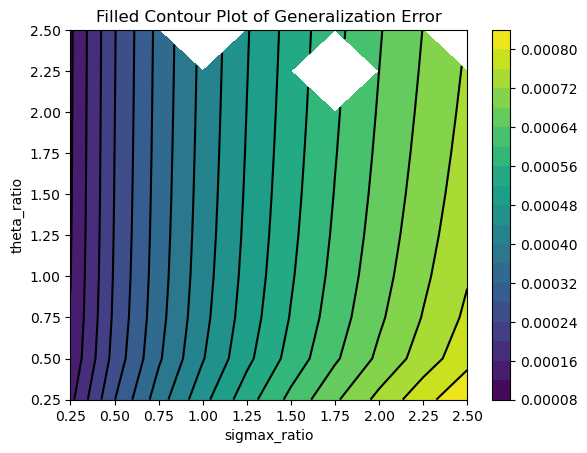

In [38]:
fig, ax = plt.subplots()

# Create the filled contour plot
contour = ax.contourf(X, Y, Z, levels=20, cmap='viridis')
ax.contour(X, Y, Z, levels=20, colors='black')
# Add colorbar
cbar = plt.colorbar(contour)

# Set labels and title
ax.set_xlabel('sigmax_ratio')
ax.set_ylabel('theta_ratio')
ax.set_title('Filled Contour Plot of Generalization Error')

# Show the plot
plt.show()